# Dimensionality Reduction

### The Curse of Dimensionality
Dimensionality refers to the number of features in a dataset.
The “Curse of Dimensionality” is when the <b>number of features</b> is very <b>large</b> relative to the number of observations in a dataset and some algorithms struggle to train effective models. 

<img src="images/curse.png",width=500,height=500>

Source: https://elitedatascience.com/dimensionality-reduction-algorithms

Dimensionality reduction algorithms fall into the tranformation category and are a family of unsupervisd learning methods. These transformations take your original dataset (containing for example more than 200 features) and will find an approximate version of that dataset that will <b>reduce the number of features</b> 

The way we - humans - try to understand samples, we usually explore them and try to visualize them using 2D plots. So the need for dimensionality reduction is necessary. The most commonly used dimensionality reduction algorithms is called <b>Principal component analysis.</b> (PCA)


<b>PCA</b>
Takes your "cloud of original data points" and finds a rotation of it.
Drops all but the <b>most informative initial dimensions</b> that capture most of the variation in the original dataset. 

if we have two original features that are highly correlated represented by this cloud of points, PCA will rotate the data so the direction of highest variance,<b> the first principal component</b>

Find the direction at right angles that maximally captures the remaining variance - <b> the second principle component</b>.

The process of finding successive principal components at right angles to the previous ones continues until the desired <b>number of principal components</b> is reached. 


Source: https://www.coursera.org/learn/python-machine-learning/lecture/cgzXI/dimensionality-reduction-and-manifold-learning

<b>Example of the iris dataset</b></b> - comprised of 4 features, projected onto 2 dimensions - most of the variance is explained:

<img src="images/pcairis.png",width=500,height=500>

Source: http://scikit-learn.org/stable/modules/decomposition.html#decompositions

## PCA implementation in sklearn

We are going to use Python's sklearn machine learning library for PCA on a data containing high dimensionality - meaning a good amount of features: We are using one of the Kaggle datasets that deals with pollution in the U.S.

Source: https://www.kaggle.com/sogun3/uspollution

In [1]:
import pandas as pd
df = pd.read_csv("pollution_us.csv")
df.head(1)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN


#### Getting the data ready for PCA
For the purpose of this example we are simply kepeping one sample for each state in order to see how this particular point will be represented with so many attributes - the datframe is composed of 29 columns

In [2]:
##keep once sample for each state
df = df.drop_duplicates(subset='State')

+ Keeping the columns with float values

In [3]:
import numpy as np
# check type of each column
df.dtypes
# columns that are floats
msk = df.dtypes == np.float64
# keep those that are floats
df2 = df.loc[:, msk]
#keep track of the states
df2['State'] = df.loc[:,'State']
df2.head(5)

C:\Users\KVA\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI,State
0,19.041667,49.0,0.022500,0.040,3.000000,9.0,13.0,1.145833,4.2,NaN,Arizona
3516,14.782609,26.0,0.015542,0.029,0.636364,2.0,3.0,0.556522,1.3,NaN,California
38306,27.434783,46.0,0.013250,0.027,4.434783,25.0,36.0,0.670833,1.4,NaN,Colorado
39766,26.541667,39.0,0.004167,0.014,11.250000,33.0,47.0,2.062500,4.1,NaN,District Of Columbia
41222,14.750000,32.0,0.023167,0.048,0.166667,1.0,1.0,0.966667,2.2,NaN,Florida


In [4]:
# drop the column with NA values
df2 = df2.drop(df2.columns[9], axis=1)
df2.head(4)

,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,State
0,19.041667,49.0,0.022500,0.040,3.000000,9.0,13.0,1.145833,4.2,Arizona
3516,14.782609,26.0,0.015542,0.029,0.636364,2.0,3.0,0.556522,1.3,California
38306,27.434783,46.0,0.013250,0.027,4.434783,25.0,36.0,0.670833,1.4,Colorado
39766,26.541667,39.0,0.004167,0.014,11.250000,33.0,47.0,2.062500,4.1,District Of Columbia


In [5]:
# put the states as index of the dataframe
df2.index = df2['State'] 
df2.head(1)
# remove the state column to keep only the floats as preperation for PCA
df2 = df2.drop(df2.columns[-1], axis=1)
df2.head(1)

,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value
State,,,,,,,,,
Arizona,19.041667,49.0,0.0225,0.04,3.0,9.0,13.0,1.145833,4.2


To understand the data a bit more we sorted the databse by mean CO levels and made visibale the states with highest CO levels

In [6]:
COsort = df2.sort_values('CO Mean', ascending=False)
COsort.head(5)

,NO2 Mean,NO2 1st Max Value,O3 Mean,O3 1st Max Value,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value
State,,,,,,,,,
District Of Columbia,26.541667,39.0,0.004167,0.014,11.250000,33.0,47.0,2.062500,4.1
Indiana,31.041667,51.0,0.003000,0.003,7.260870,12.0,17.0,2.054167,3.9
Arizona,19.041667,49.0,0.022500,0.040,3.000000,9.0,13.0,1.145833,4.2
New Jersey,24.250000,31.0,0.003208,0.005,15.583333,39.0,55.0,1.145833,2.6
Tennessee,1.000000,1.0,0.037208,0.051,1.000000,1.0,1.0,1.000000,1.0


But again this is just classifying our data based on one feature so we need PCA to reduce the dimensionality of our datasets with the 9 feautres left

####  PCA on this high dimensionality PCA
+ pip install sklearn

Following the tutorial at: https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

In [7]:
from sklearn.decomposition import PCA
#need to specify the number of principal components (in this example it it is set to 2)
pca = PCA(n_components=2)
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
df2d = pca.transform(df2)

+ Getting the results of the first and second principle component for each state

In [9]:
df_2d = pd.DataFrame(df2d)
df_2d.index = df2.index
df_2d.columns = ['PC1','PC2']
df_2d.head()

,PC1,PC2
State,,
Arizona,14.077757,-14.511895
California,-10.334139,-7.896598
Colorado,34.088514,6.021901
District Of Columbia,39.250864,21.382825
Florida,-8.101079,-13.414407


+ Variance of PC1 and PC2

In [10]:
pca.explained_variance_ratio_

array([ 0.75403283,  0.22801961])

We see that the <b>first</b> PC already explains almost <b>75%</b> of the variance, while the
<b>second</b> one accounts for another <b>22%</b> for a <b>total</b> of almost <b>97%</b> between the two of
them. So the most varience will occur on the y axis
Let's visualize it the graph below

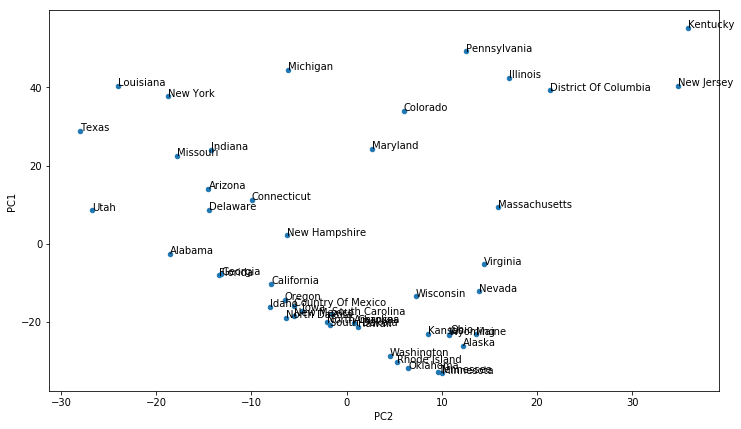

In [11]:
%matplotlib inline
    
ax = df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(12,7))
    
for i, state in enumerate(df2.index):
    ax.annotate(
        state, 
        (df_2d.iloc[i].PC2, df_2d.iloc[i].PC1)
    )

## Normalize Data

+ Mean

In [12]:
from sklearn.preprocessing import normalize
    
df_2d['CO2_mean'] = pd.Series(df2.mean(axis=1), index=df_2d.index)
CO2_mean_max = df_2d['CO2_mean'].max()
CO2_mean_min = df_2d['CO2_mean'].min()
CO2_mean_scaled = (df_2d.CO2_mean-CO2_mean_min) / CO2_mean_max
df_2d['CO2_mean_scaled'] = pd.Series(
        CO2_mean_scaled, 
        index=df_2d.index) 
df_2d.head()

,PC1,PC2,CO2_mean,CO2_mean_scaled
State,,,,
Arizona,14.077757,-14.511895,10.938889,0.482594
California,-10.334139,-7.896598,5.368893,0.225660
Colorado,34.088514,6.021901,15.664517,0.700580
District Of Columbia,39.250864,21.382825,18.108037,0.813295
Florida,-8.101079,-13.414407,5.794945,0.245313


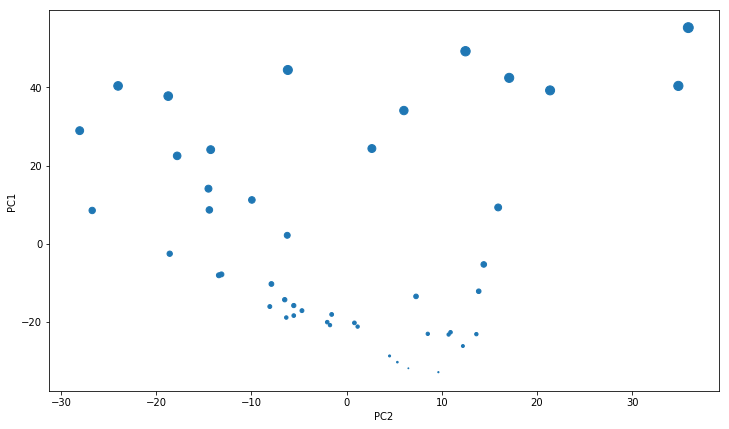

In [13]:
df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=df_2d['CO2_mean_scaled']*100, 
    figsize=(12,7))

+ Sum

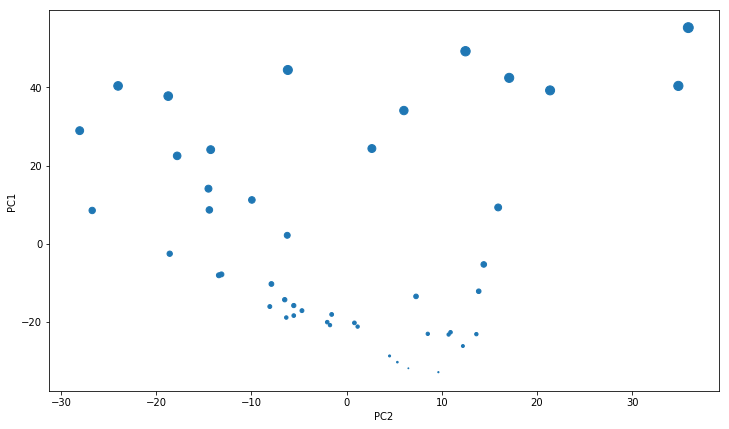

In [14]:
df_2d['CO2_sum'] = pd.Series(df2.sum(axis=1), index=df_2d.index)
CO2_sum_max = df_2d['CO2_sum'].max()
CO2_sum_min = df_2d['CO2_sum'].min()
CO2_sum_scaled = (df_2d.CO2_sum-CO2_sum_min) / CO2_sum_max
df_2d['CO2_sum_scaled'] = pd.Series(
        CO2_sum_scaled, 
        index=df_2d.index) 
df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=df_2d['CO2_sum_scaled']*100, 
    figsize=(12,7))

The states are spread in the graph but there is a concentration at the bottom center. Performing a clustering algorithm on our findings can further categorize the states and group them in clusters. That's why we will perfom K-Means Clustering.


# K-Means Clustering

 sklearn's k-means clustering implementation

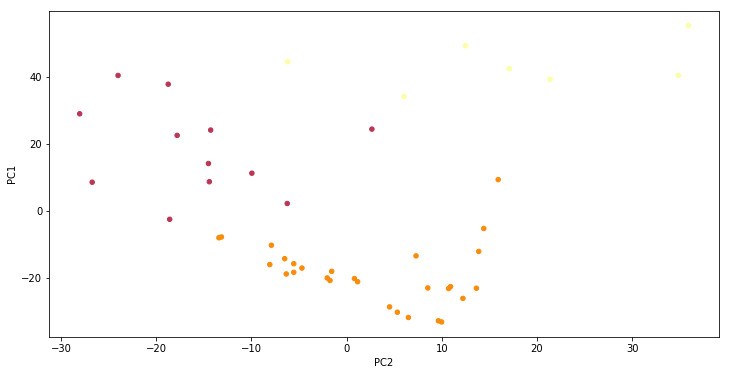

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import cycle, islice
from matplotlib import cm


#set the number of clusters: 3
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(df2)
df_2d['cluster'] = pd.Series(clusters.labels_, index=df_2d.index)
color = cm.inferno_r(df_2d.cluster.astype(np.float)/4)

df_2d.plot(kind='scatter',x='PC2',y='PC1',c=color, figsize=(12,6))


<p>We've set the number of clusters to 3 so the result of the graph is 3 groups. </p>
<ol>
<li>Cluster top left --> RED</li>
<li>Cluster Bottom Center --> Yellow</li>
<li>Cluster top Right --> Orange</li>
</ol>
<p>Let's see which states actually belong to each cluster by printing them out</p>

In [16]:
# snippet of code taken from @thepolina from stack overflow
# Souce https://stackoverflow.com/questions/29799053/how-to-print-result-of-clustering-in-sklearn

labels = kmeans.predict(df2)
clusters = {}
n = 0

# associate each state to a cluster
for item in labels:
    if item in clusters:
        clusters[item].append(df2.index[n])
    else:
        clusters[item] = [df2.index[n]]
    n +=1

# print the cluster
for item in clusters:
    print "Cluster ", item
    for i in clusters[item]:
        print i
    print 

Cluster  0
Colorado
District Of Columbia
Illinois
Kentucky
Michigan
New Jersey
Pennsylvania

Cluster  1
California
Florida
Kansas
North Carolina
Oklahoma
Virginia
Massachusetts
Nevada
Tennessee
South Carolina
Iowa
Maine
Wisconsin
Country Of Mexico
Arkansas
Oregon
Wyoming
North Dakota
Idaho
Ohio
Georgia
Hawaii
Minnesota
New Mexico
Rhode Island
South Dakota
Washington
Alaska

Cluster  2
Arizona
Indiana
Louisiana
Missouri
New York
Texas
New Hampshire
Connecticut
Maryland
Delaware
Utah
Alabama



So we needed to perfor PCA or a dimensionality reduction algorith on the datset before using the the K-means algorithms, otherwise this ML algorithm would not have worked on our high dimensionality dataset.